## Logistic Regression

In this session we will consider a classification problem using the **breat cancer** data from datasets module.

In [1]:
from sklearn import datasets
bc = datasets.load_breast_cancer()

First we see the brief description of the data.

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

### The Problem
The classification problem in this example is to classify a tumor as 'malignant' or 'benign' based on the available features of the tumor. 

We will consider only one feature 'mean area' in this example.

In [5]:
import numpy as np
import pandas as pd
bc_X = bc.data[:,np.newaxis, 3]
bc_y = 1 - bc.target
bcdf = pd.DataFrame(np.hstack([bc_X, bc_y[:,np.newaxis]]),
                      columns = ["MeanArea", "Malignant"])
bcdf.head()

,MeanArea,Malignant
0,1001.0,1.0
1,1326.0,1.0
2,1203.0,1.0
3,386.1,1.0
4,1297.0,1.0


Next, we visualize the data using Box plot.

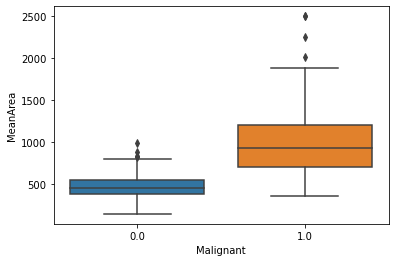

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="Malignant", y="MeanArea", data=bcdf)
plt.show()

Next we split the data into trainiing data and test data.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc_X, bc_y, test_size=0.33, random_state = 654487)

For using Logistic regression, we need to use the `LogisticRegression` estimator from `linear_model` module.

In [8]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'liblinear')
LR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Note the use of `solver` parameter while instantiating LogisticRegression estimator. This parameter specifies the algorithm to be used for optimization while fitting parameters. For binary classification problems with small dataset, 'liblinear' solver is recommended.

In [9]:
y_pred = LR.predict(X_test) 
print('Accuracy = %0.4f'%np.mean(y_pred == y_test))

Accuracy = 0.8723


In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

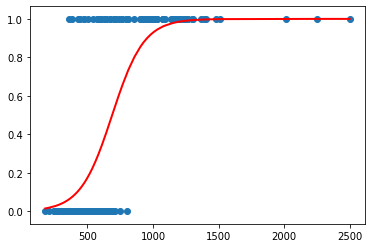

In [10]:
plt.scatter(X_test, y_test)
prob_pred = LR.predict_proba(X_test)[:,1]
s_order = np.argsort(X_test[:,0])
plt.plot(X_test[s_order,0], prob_pred[s_order], color='red', linewidth=2)
plt.show()

### Home Work

1. Use Kfold cross validation to estimate accuracy of logistic regression model with **mean area** as the feature.
2. 
  1. Standardize the training data comprizing of all 30 numeric features using the `preprocessing` modue of Scikit Learn. Visit https://scikit-learn.org/stable/modules/preprocessing.html for help.
  2. Use standardized training data to train logistic regression model using all 30 features.
  3. Estimate accuracy of the model using the test data.